In [433]:
import numpy as np
import pandas as pd

In [434]:
df = pd.read_csv("Moneyball2.csv")

In [435]:
df.head()

,League,Year,OBP,SLG,BA,Playoffs,G,OOBP,OSLG,RD
0,NL,2012,0.328,0.418,0.259,0,162,0.317,0.415,46
1,NL,2012,0.320,0.389,0.247,1,162,0.306,0.378,100
2,AL,2012,0.311,0.417,0.247,1,162,0.315,0.403,7
3,AL,2012,0.315,0.415,0.260,0,162,0.331,0.428,-72
4,NL,2012,0.302,0.378,0.240,0,162,0.335,0.424,-146


In [436]:
df.describe()

,Year,OBP,SLG,BA,Playoffs,G,OOBP,OSLG,RD
count,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,420.000000,420.000000,1232.000000
mean,1988.869318,0.326121,0.397342,0.259273,0.198052,161.918831,0.332264,0.419743,0.000000
std,15.023836,0.025639,0.033267,0.012907,0.398693,0.624365,0.015295,0.026510,102.785376
min,1900.000000,-0.300000,0.301000,0.214000,0.000000,158.000000,0.294000,0.346000,-337.000000
25%,1976.000000,0.317000,0.375000,0.251000,0.000000,162.000000,0.321000,0.401000,-72.000000
50%,1989.000000,0.326000,0.396000,0.260000,0.000000,162.000000,0.331000,0.419000,4.000000
75%,2002.000000,0.337000,0.421000,0.268000,0.000000,162.000000,0.343000,0.438000,74.000000
max,2012.000000,0.700000,0.491000,0.294000,1.000000,165.000000,0.384000,0.499000,309.000000


In [437]:
df.isna().sum()

League        0
Year          0
OBP           0
SLG           0
BA            0
Playoffs      0
G             0
OOBP        812
OSLG        812
RD            0
dtype: int64

In [438]:
df.fillna(0, inplace=True)

In [439]:
numerical_columns = df.select_dtypes(include=['number']).columns.to_list()
numerical_columns

['Year', 'OBP', 'SLG', 'BA', 'Playoffs', 'G', 'OOBP', 'OSLG', 'RD']

In [440]:
categorial_columns = ['League']
categorial_columns

['League']

In [441]:
import seaborn as sns

#sns.pairplot(df[numerical_columns])

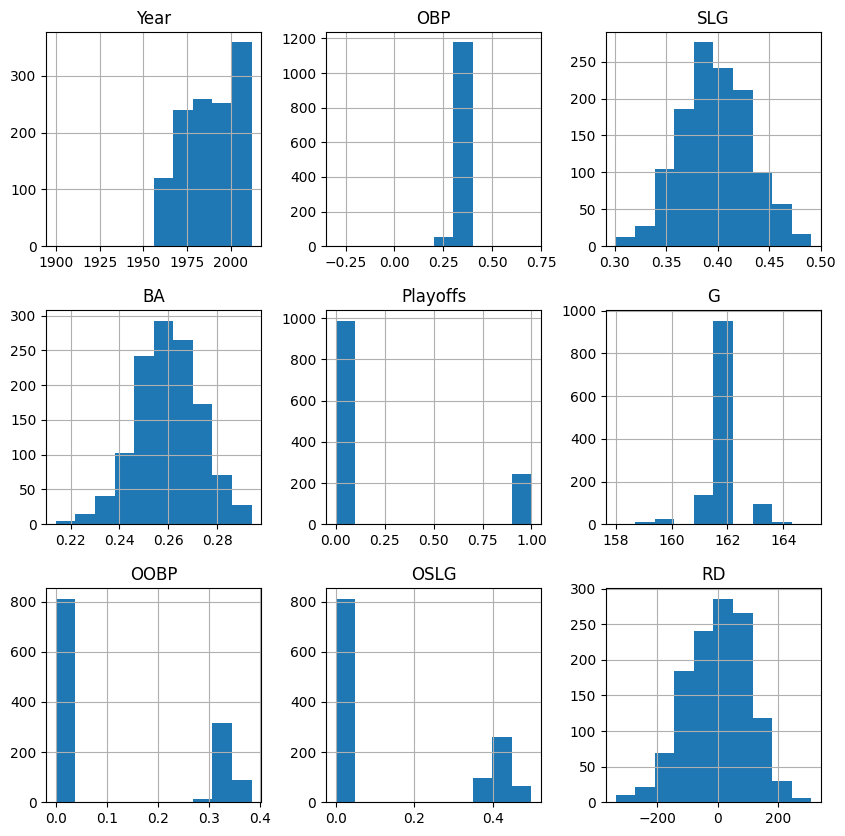

In [442]:
import matplotlib.pyplot as plt

df.hist(figsize=(10,10))
plt.show()

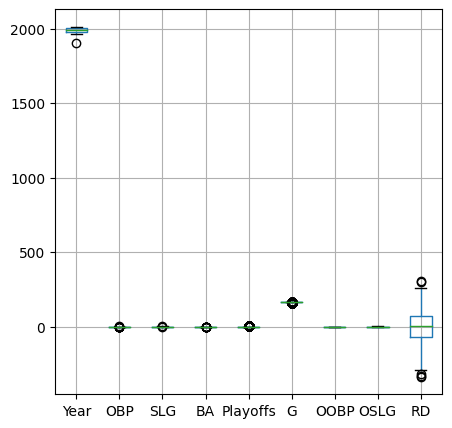

In [443]:
df.boxplot(column=numerical_columns, figsize=(5,5))
plt.show()

In [444]:
df = df[df['BA'] >= 0.24]
df = df[df['RD'] >= -260]
df = df[df['RD'] <= 260]

In [445]:
df = df.drop(df[df.Year == 1900].index)

df = df.drop(df[df.OBP == -0.3].index)
df = df.drop(df[df.OBP == 0.7].index)

In [446]:
df = pd.get_dummies(df, columns=categorial_columns, drop_first=True)

In [447]:
X = df.drop(columns = ['RD'])
y = df['RD']

In [448]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [449]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

linear_regressor_pipe = Pipeline([
  ("scaler", StandardScaler()),
  ("linear_regression", LinearRegression()),
])

linear_regressor_pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_regression', LinearRegression())])

In [450]:
y_pred = linear_regressor_pipe.predict(X_test)

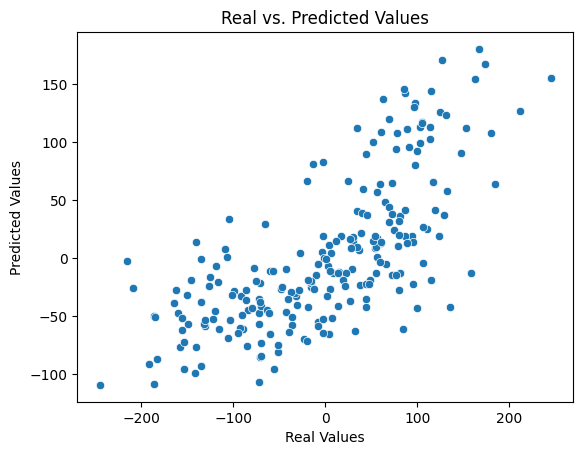

In [451]:
import matplotlib.pyplot as plt

sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('Real vs. Predicted Values')
plt.show()

In [452]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [453]:
mean_absolute_error(y_test, y_pred)

52.41206801723515

In [454]:
np.sqrt(mean_squared_error(y_test, y_pred))

66.7933976187798

In [455]:
X = df.drop(columns = ['Playoffs'])
y = df['Playoffs']

In [456]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [457]:
from sklearn.svm import SVC

svc_clf = Pipeline([
  ("scaler", StandardScaler()),
  ("linear_svc", SVC(kernel='rbf',C=1)),
])

svc_clf.fit(X_train, y_train)
y_pred = svc_clf.predict(X_test)

In [ ]:
import pickle

with open('svc_model.pkl', 'wb') as f:
    pickle.dump(svc_clf, f)

In [458]:
y_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [459]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[178,   9],
       [ 15,  26]])

In [460]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))

Accuracy: 0.8947368421052632
Precision: 0.7428571428571429
Recall: 0.6341463414634146
F1-Score: 0.6842105263157895
